# 1. Importing Libraries

In [1]:
!pip install pandas

In [4]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.4 kB 465.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 521.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 554.9 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 615.9 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.4 kB 621.6 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/301.4 kB 625.8 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/301.4 kB 628.5 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 632.9 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 620.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated p

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import DataFrame, read_csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MANASA N
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# 2. Load the dataset

In [ ]:

df = pd.read_csv("E:/Dell Project/SMS spam collection dataset/spam.csv", encoding = "latin-1")

In [24]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 3. Data Cleaning

In [28]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5580 non-null   object
 1   v2          5580 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.1+ KB


#### drop the columns

In [30]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], inplace = True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Rename the columns

In [32]:
# Rename the columns
df.rename(columns = { 'v1' : 'label', 'v2' : 'Messages'}, inplace = True)
df.head(5)

,label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### convert labels to numerical values

In [35]:
df['label'] = df['label'].map({'ham' : 0, 'spam' : 1})
df.head(5)

,label,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### checking missing values

In [38]:

df.isnull().sum()

label       0
Messages    0
dtype: int64

#### check duplicate values

In [41]:

df.duplicated().sum()

403

#### remove duplicate values

In [44]:

df.drop_duplicates(keep = 'first')

,label,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5575,1,Wells Fargo Bank: Your account is temporarily ...
5576,1,"Hello, your FEDEX package with tracking code D..."
5577,1,Apple Notification. Your apple icloud ID expir...
5578,1,((Coinbase)) Amount received 2.221 Bitcoin BTC...


#### shape of dataset

In [47]:

df.shape

(5580, 2)

# 4. EDA

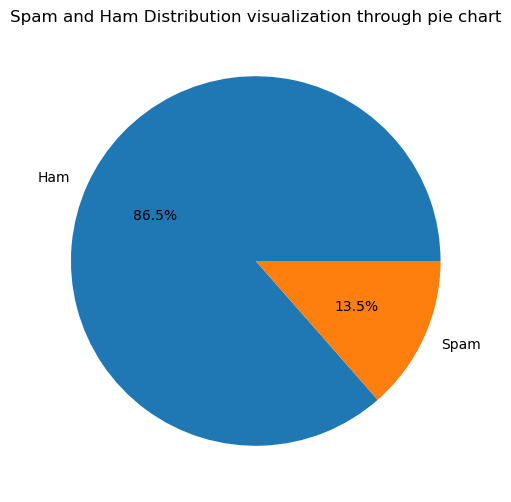

In [50]:

# visualization through pie chart
label_counts = df['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels = ['Ham', 'Spam'], autopct = '%1.1f%%')
plt.title('Spam and Ham Distribution visualization through pie chart')
plt.show()

In [51]:
# text length and structure analysis
df['n_char'] = df['Messages'].apply(len)
df['n_words'] = df['Messages'].apply(lambda x: len(nltk.word_tokenize(x)))
df['n_sent'] = df['Messages'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [52]:
df[['n_char','n_words','n_sent']].describe()

,n_char,n_words,n_sent
count,5580.000000,5580.000000,5580.000000
mean,80.165771,18.701792,1.996416
std,59.662767,13.732508,1.519304
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
# summary statistics for Ham messages
df[df['label']==0][['n_char','n_words','n_sent']].describe()

,n_char,n_words,n_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
# summary statistics for spam messages
df[df['label']==1][['n_char','n_words','n_sent']].describe()

,n_char,n_words,n_sent
count,755.000000,755.000000,755.000000
mean,138.590728,27.811921,3.010596
std,29.177917,6.877991,1.534707
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [58]:
df.head(5)

,label,Messages,n_char,n_words,n_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='n_char', ylabel='Count'>

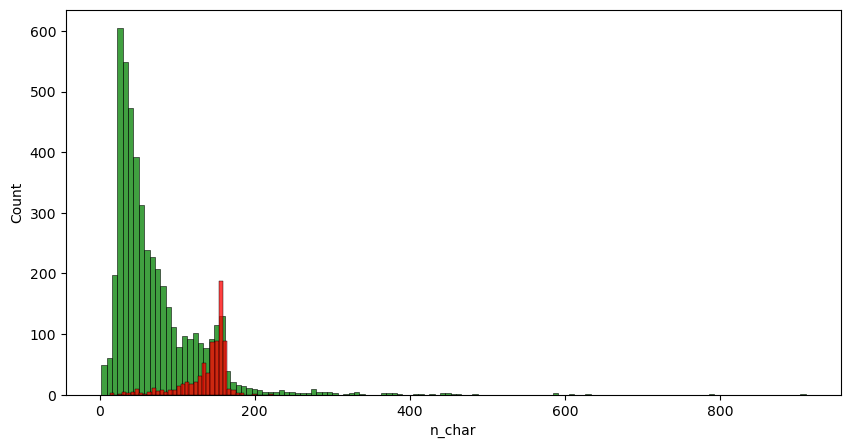

In [62]:
# visual representation of character length distribution for spam & ham messages
plt.figure(figsize=(10,5))
sns.histplot(df[df['label']==0]['n_char'],color='green')
sns.histplot(df[df['label']==1]['n_char'],color='red')


<Axes: xlabel='n_words', ylabel='Count'>

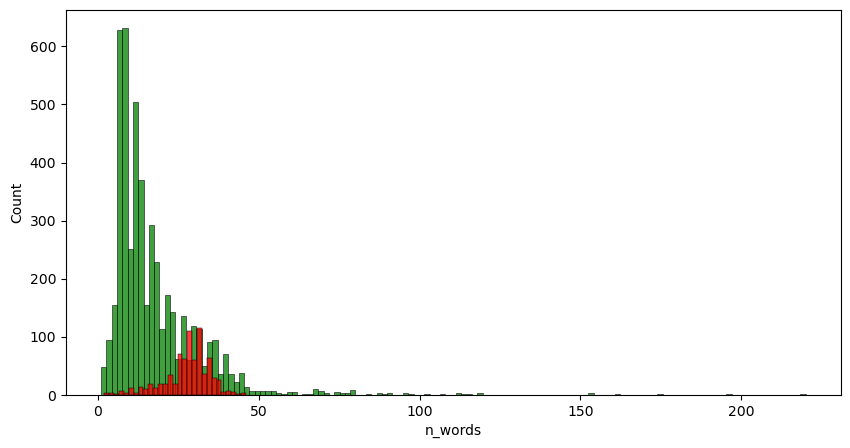

In [63]:
# visual representation of word count distribution for spam & ham messages
plt.figure(figsize=(10,5))
sns.histplot(df[df['label']==0]['n_words'],color='green')
sns.histplot(df[df['label']==1]['n_words'],color='red')


<Axes: xlabel='n_sent', ylabel='Count'>

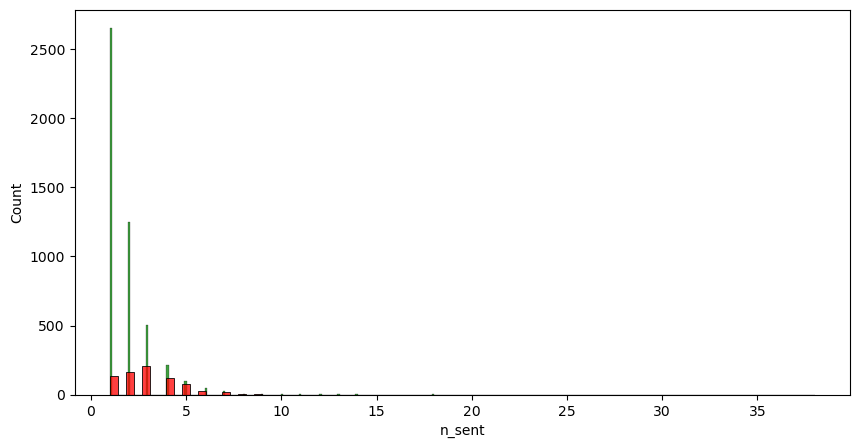

In [65]:
# visual representation of number of sentences distribution for spam & ham messages
plt.figure(figsize=(10,5))
sns.histplot(df[df['label']==0]['n_sent'],color='green')
sns.histplot(df[df['label']==1]['n_sent'],color='red')


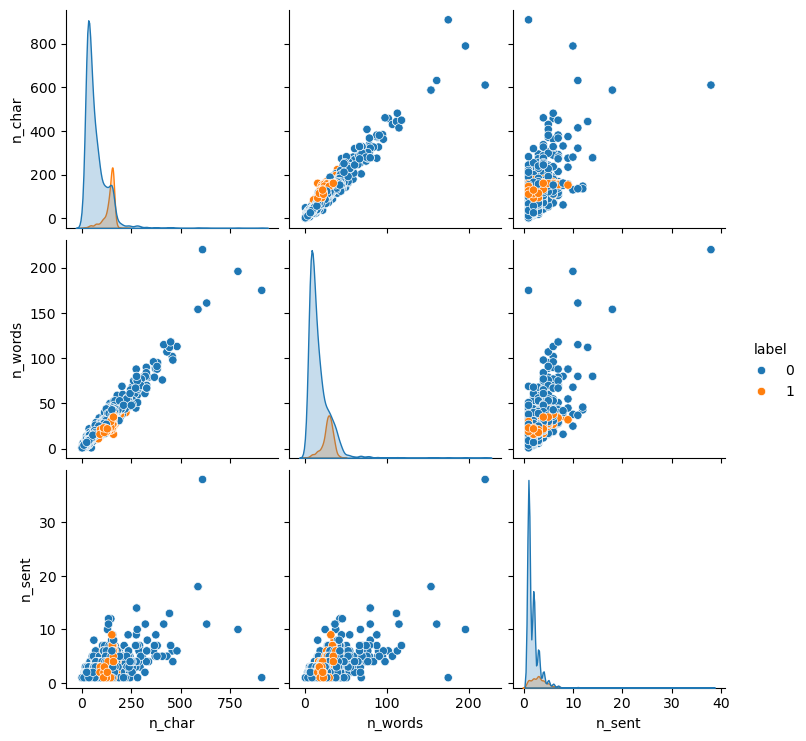

In [67]:
# pairplot for data visualization
sns.pairplot(df, hue = 'label')

In [68]:
# correlation
df[['label','n_char','n_words','n_sent']].corr()

,label,n_char,n_words,n_sent
label,1.000000,0.387399,0.262445,0.264079
n_char,0.387399,1.000000,0.966157,0.631576
n_words,0.262445,0.966157,1.000000,0.685012
n_sent,0.264079,0.631576,0.685012,1.000000


# 5. Data Preprocessing

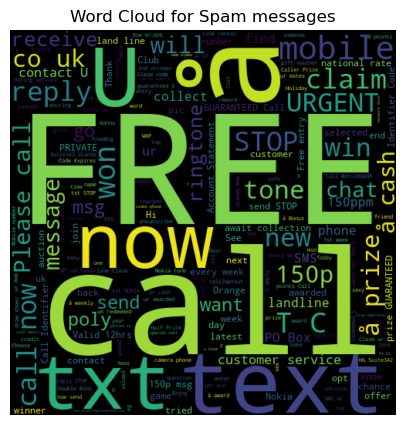

In [71]:
# word cloud for spam messages
spam_wc = ' '.join(list(df[df['label'] == 1]['Messages']))
wc = WordCloud(width = 500, height = 500, background_color = 'black').generate(spam_wc)
plt.figure(figsize = (10,5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam messages')
plt.show()


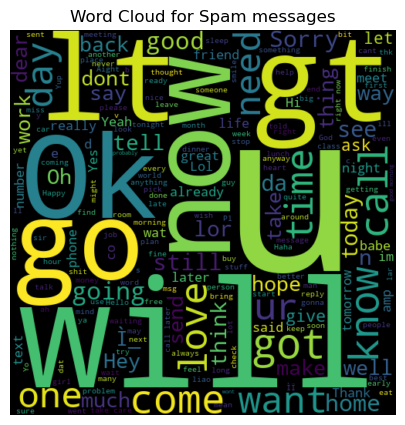

In [72]:
# word cloud for Ham messages
spam_wc = ' '.join(list(df[df['label'] == 0]['Messages']))
wc = WordCloud(width = 500, height = 500, background_color = 'black').generate(spam_wc)
plt.figure(figsize = (10,5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam messages')
plt.show()

# 6. Model training

In [74]:
# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df['Messages'],df['label'],test_size = 0.2, random_state = 42)

In [75]:
# feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [76]:
# Create and train the model
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

# 7. Evaluate the model

In [78]:

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9605734767025089


In [79]:
# getting user input and predict
while True:
    user = input("Enter a message ( to exit enter 'quit') : ")
    if user == 'quit':
        break
    user_vectorized = vectorizer.transform([user])
    prediction = model.predict(user_vectorized)[0]
    if prediction == 1:
        print("Predicted it is SPAM Message")
    else:
        print("Predicted it is a HAM Message")

Enter a message ( to exit enter 'quit') :  Is your team looking to achieve more with less? Our tools can help you do just that, but don’t just take our word for it. Learn for yourself at the best virtual event of the whole year.  Our top-notch experts are ready to engage you in interactive sessions, answer your toughest questions, and help you overcome your biggest challenges.  So, don’t wait another moment to register for SmartBear Connect!     Reserve here!     Best, The SmartBear Connect Team


Predicted it is a HAM Message


Enter a message ( to exit enter 'quit') :  Don’t Miss Out: Learn How-to Level-up Your Test Automation in Jira!


Predicted it is a HAM Message


Enter a message ( to exit enter 'quit') :  Last chance to save 35%!


Predicted it is a HAM Message


Enter a message ( to exit enter 'quit') :  Ready to Level-up your Test Automation In Jira? Discover How at Our Webinar!


Predicted it is a HAM Message


Enter a message ( to exit enter 'quit') :  Amazon is sending you a refunding of $32.64. Please reply with ur bank account & routing number to recieve your refund


Predicted it is a HAM Message


Enter a message ( to exit enter 'quit') :  Congratulations! You've won $1,000 Walmart gift card. Go to http://bit.ly/123456 tp claim now.


Predicted it is SPAM Message


Enter a message ( to exit enter 'quit') :  stop


Predicted it is a HAM Message


Enter a message ( to exit enter 'quit') :  quit
